# we will test the energy dissipation criterion

In [1]:
import numpy as np
from creation_peigne import *
# MRG packages
import zsolutions4students as zsolutions
import solve 

generating the mesh

In [ ]:
p_elem2nodes, elem2nodes, node_coords=creation_maillage(hauteur=20,lar_moyenne=20,amplitude_max=15,amplitude_min=7,epaisseur=4,type='triangle',order=False)
affichage(p_elem2nodes,elem2nodes,node_coords,barycentre=False)

In [ ]:
nnodes=node_coords.shape[0]
values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
f_unassembled = numpy.ones((nnodes, 1), dtype=numpy.complex128)

A,_=solve.resolve_eq(p_elem2nodes, elem2nodes, node_coords,f_unassembled,values_at_nodes_on_boundary,D3=True,frequency=0.5)
eig_Val,eig_Vec=np.linalg.eig(A)

lets look at the 10 most and least localized eigen modes 

In [4]:
W1=[] #list of pairs, number of eigenvector/exictence surface related defined as list as easier to sort

for i in range(0,eig_Vec.shape[0]):

    _,solreal=solve.resolve_eq(p_elem2nodes, elem2nodes, node_coords,eig_Vec[i],values_at_nodes_on_boundary,frequency=0.5,affichage=False)
    W1.append((solve.calcule_energie_dissipation(solreal,node_coords,p_elem2nodes,elem2nodes),i))  

W1=sorted(W1)

#now let's check eigenvectors with minimum S, these eigenvectors should be the ones to localize the most

solutions by order of localizing the wave
mode number : 450


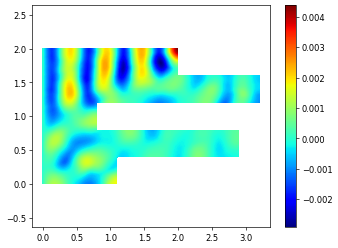

mode number : 8


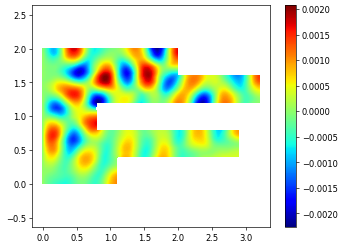

mode number : 84


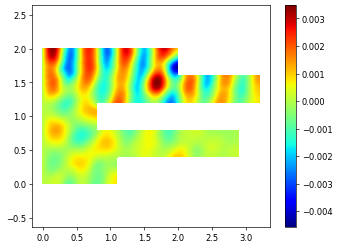

mode number : 327


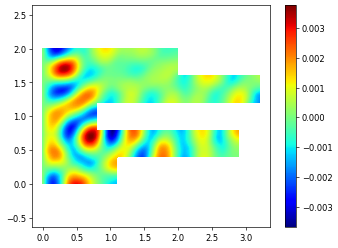

mode number : 224


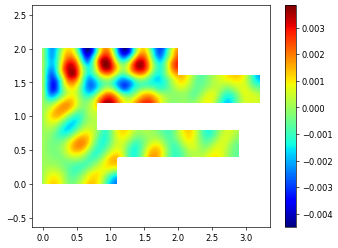

mode number : 49


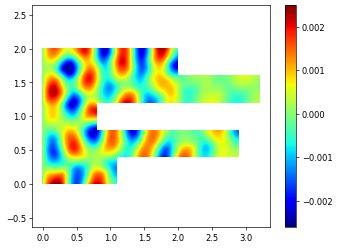

mode number : 218


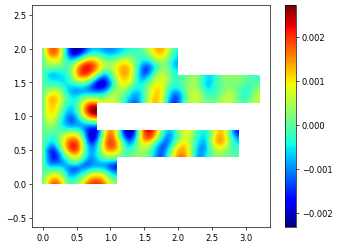

mode number : 179


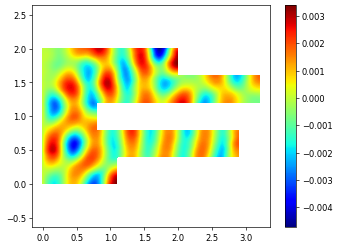

mode number : 234


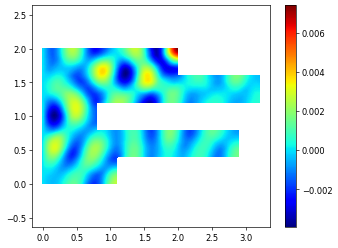

mode number : 301


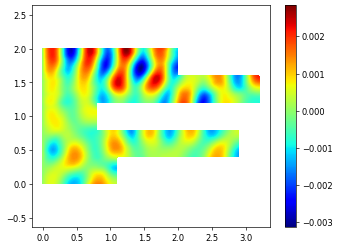

In [5]:
nnodes=node_coords.shape[0]
values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)

print('solutions by order of localizing the wave')
for i in range(10):#let's look at the the first 10 eigenvectors with least S
    print('mode number : '+str(W1[i][1]))
    solve.resolve_eq(p_elem2nodes, elem2nodes, node_coords,eig_Vec[W1[i][1]],values_at_nodes_on_boundary,frequency=0.5)

solutions by order of localizing the wave
mode number : 211


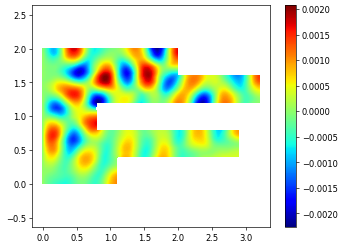

mode number : 212


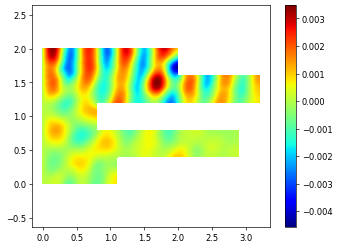

mode number : 11


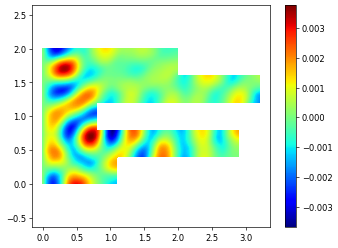

mode number : 47


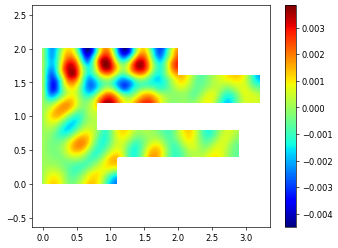

mode number : 199


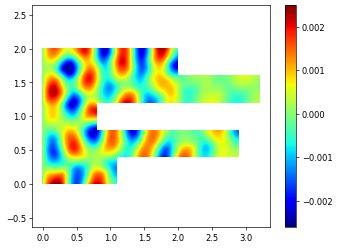

mode number : 175


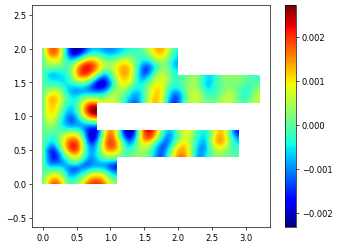

mode number : 180


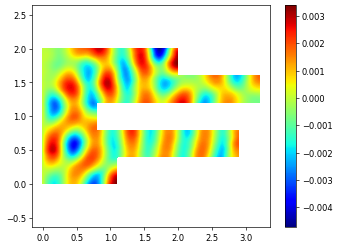

mode number : 30


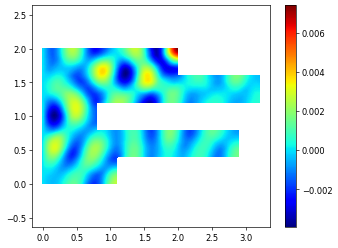

mode number : 18


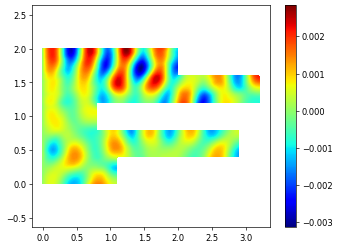

In [7]:
nnodes=node_coords.shape[0]
values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)

print('solutions by order of localizing the wave')
for i in range(1,10):#let's look at the the first 10 eigenvectors with least S
    print('mode number : '+str(W1[-i][1]))
    solve.resolve_eq(p_elem2nodes, elem2nodes, node_coords,eig_Vec[W1[-i][1]],values_at_nodes_on_boundary,frequency=0.5)